# Import Packages

In [7]:
#Import pandas and numpy
import pandas as pd
import numpy as np
from numpy import random

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

import glob
import os
import zipfile

# Import data

In [8]:
path = '/Users/anitaowens/Documents/Github/Data-with-Python/datasets'

In [ ]:
for name in glob.glob('*'):
    print(name)

In [9]:
#Look for Py files
for name in glob.glob('*.py'):
    print(name)

ETL.py
hello-world.py


In [4]:
#All files in a subdirectory
for name in glob.glob('datasets/*'):
    print(name)

datasets/laptops.csv
datasets/florida_hurricane_dates.pkl
datasets/onebike_datetimes.csv
datasets/dictionary.txt
datasets/tips.csv
datasets/marketing.csv
datasets/NYC_Flights_2013
datasets/avocado.csv
datasets/raw_nyc_phil.json
datasets/romeo.txt


In [10]:
for name in glob.glob('datasets/NYC_Flights_2013/*'):
    print(name)

datasets/NYC_Flights_2013/airlines.csv
datasets/NYC_Flights_2013/flights_unzip
datasets/NYC_Flights_2013/weather.csv
datasets/NYC_Flights_2013/airports.csv
datasets/NYC_Flights_2013/planes.csv
datasets/NYC_Flights_2013/flights.zip


In [11]:
# Get a list of all the csv files
csv_files = glob.glob('datasets/NYC_Flights_2013/*.csv')

# List comprehension that loads of all the files
dfs = [pd.read_csv(file) for file in csv_files]

# List comprehension that looks at the shape of all DataFrames
print([file.shape for file in dfs])

[(16, 2), (26130, 15), (1458, 8), (3322, 9)]


In [59]:
#Extract zipped file
with zipfile.ZipFile('datasets/NYC_Flights_2013/flights.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets/NYC_Flights_2013/flights_unzip')

In [6]:
flights = pd.read_csv('datasets/NYC_Flights_2013/flights_unzip/flights.csv')
print(flights.head())

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416 

# Inspect data

In [61]:
print(flights.head(3))

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   

   distance  hour  minute            time_hour  
0      1400     5      15  2013-01-01 05:00:00  
1      1416     5      29  2013-01-01 05:00:00  
2      1089     5      40  2013-01-01 05:00:00  


In [ ]:
# Get the planes DataFrame
planes = dfs[3]

# Count the frequency of engines in our data
print(planes['engines'].value_counts())

In [ ]:
# Look at all planes with >= 3 engines
print(planes[planes['engines'] >= 3])

In [ ]:
# Look at all planes with >= 3 engines and <= 100 seats
print(planes.loc[(planes['engines'] >= 3) & (planes['seats'] <= 100)])

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of engines and seats
planes.plot(x="engines", y="seats", kind="scatter")
plt.show()

In [ ]:
# Histogram of seats
planes['seats'].plot(kind='hist')
plt.show()

In [ ]:
# Boxplot of seats by engine
planes.boxplot(column="seats", by='engine')
plt.xticks(rotation=45)
plt.show()

# Data transformation

In [62]:
# Print time_hour
print(flights['time_hour'])

0         2013-01-01 05:00:00
1         2013-01-01 05:00:00
2         2013-01-01 05:00:00
3         2013-01-01 05:00:00
4         2013-01-01 06:00:00
                 ...         
336771    2013-09-30 14:00:00
336772    2013-09-30 22:00:00
336773    2013-09-30 12:00:00
336774    2013-09-30 11:00:00
336775    2013-09-30 08:00:00
Name: time_hour, Length: 336776, dtype: object


In [ ]:
# Apply the function on data
flights['season'] = flights['time_hour'].apply(get_season)

# Print time_hour and season
print(flights[['time_hour', 'season']])

In [71]:
# Calculate total_delay
flights['total_delay'] = flights['dep_delay'] + flights['arr_delay']

# Mean total_delay by carrier
tdel_car = flights.groupby('carrier')['total_delay'].mean().reset_index()
print(tdel_car)

   carrier  total_delay
0       9E    23.819244
1       AA     8.933421
2       AS    -4.100141
3       B6    22.425521
4       DL    10.868291
5       EV    35.635360
6       F9    42.121880
7       FL    38.721890
8       HA    -2.014620
9       MQ    21.220114
10      OO    24.517241
11      UA    15.574920
12      US     5.874288
13      VX    14.521110
14      WN    27.310777
15      YV    34.455882


In [63]:
# Calculate total_delay
flights['total_delay'] = flights['dep_delay'] + flights['arr_delay']
flights['total_delay'].head()

0    13.0
1    24.0
2    35.0
3   -19.0
4   -31.0
Name: total_delay, dtype: float64

In [67]:
# Mean total_delay by carrier
tdel_car = flights.groupby('carrier')['total_delay'].mean().reset_index()
print(tdel_car)

   carrier  total_delay
0       9E    23.819244
1       AA     8.933421
2       AS    -4.100141
3       B6    22.425521
4       DL    10.868291
5       EV    35.635360
6       F9    42.121880
7       FL    38.721890
8       HA    -2.014620
9       MQ    21.220114
10      OO    24.517241
11      UA    15.574920
12      US     5.874288
13      VX    14.521110
14      WN    27.310777
15      YV    34.455882


In [ ]:
# Mean dep_delay and arr_delay for each season
dadel_season = flights.groupby('season')['dep_delay', 'arr_delay'].mean().reset_index()
print(dadel_season)

In [69]:
# Mean and std delays by origin
del_ori = flights.groupby('origin')['total_delay', 'dep_delay', 'arr_delay'].agg(['mean', 'std'])
print(del_ori)

/var/folders/b4/r2b0spdj3mz03127m_zx742r0000gn/T/ipykernel_40256/2060356411.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del_ori = flights.groupby('origin')['total_delay', 'dep_delay', 'arr_delay'].agg(['mean', 'std'])


       total_delay             dep_delay            arr_delay           
              mean        std       mean        std      mean        std
origin                                                                  
EWR      24.116165  85.135466  15.107954  41.323704  9.107055  45.529183
JFK      17.575088  81.050496  12.112159  39.035071  5.551481  44.277448
LGA      16.070071  81.937556  10.346876  39.993021  5.783488  43.862273


# Exploratory Analysis

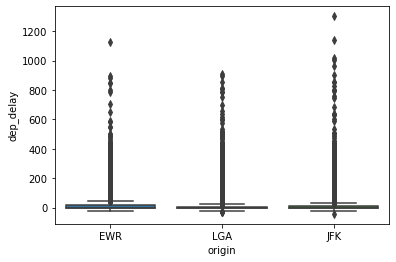

In [64]:
sns.boxplot(x='origin', y='dep_delay', data=flights)
plt.show()

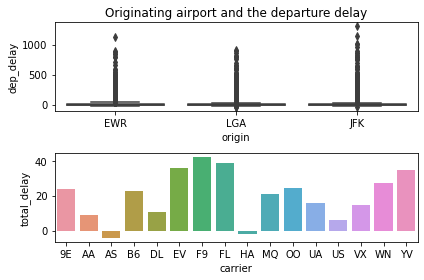

In [70]:
# Create a figure
fig, (ax1, ax2) = plt.subplots(2,1)

# Boxplot and barplot in the axes
sns.boxplot(x='origin', y='dep_delay', data=flights, ax=ax1)
sns.barplot(x='carrier', y='total_delay', data=tdel_car, ax=ax2)

# Label axes
ax1.set_title('Originating airport and the departure delay')

# Use tight_layout() so the plots don't overlap
fig.tight_layout()
plt.show()

In [72]:
print(flights.head())

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute            time_hour  total_delay  
0      1400     5      15  2013-01-01 05:00:00  

# Dummy variables

In [73]:
flights_sub = flights[['year', 'month', 'day', 'dep_time', 'dep_delay', 'origin']]

In [75]:
# Create dummy variables for the origin column
flights_dummies = pd.get_dummies(flights_sub)

flights_dummies.head()

,year,month,day,dep_time,dep_delay,origin_EWR,origin_JFK,origin_LGA
0,2013,1,1,517.0,2.0,1,0,0
1,2013,1,1,533.0,4.0,0,0,1
2,2013,1,1,542.0,2.0,0,1,0
3,2013,1,1,544.0,-1.0,0,1,0
4,2013,1,1,554.0,-6.0,0,0,1
